## LOAD LIBRARIES

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

## LOAD DATA
do basic data checks

In [26]:
# Load the data
data = pd.read_csv('./data/education_career_success.csv')
data.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


In [27]:
# Check for missing values
data.isna().sum().sum()

0

In [28]:
# Check the dimensions of the data
data.shape

(5000, 20)

## EXPLORATORY DATA ANALYSIS

In [29]:
# Check the data types
data.dtypes

Student_ID                object
Age                        int64
Gender                    object
High_School_GPA          float64
SAT_Score                  int64
University_Ranking         int64
University_GPA           float64
Field_of_Study            object
Internships_Completed      int64
Projects_Completed         int64
Certifications             int64
Soft_Skills_Score          int64
Networking_Score           int64
Job_Offers                 int64
Starting_Salary          float64
Career_Satisfaction        int64
Years_to_Promotion         int64
Current_Job_Level         object
Work_Life_Balance          int64
Entrepreneurship          object
dtype: object

In [30]:
# Check the distribution of the target variable
data['Job_Offers'].value_counts()

Job_Offers
2    856
0    848
5    843
3    826
1    823
4    804
Name: count, dtype: int64

In [31]:
# create a table to show distribution of the target variable categories
DIST_TARGET = data['Job_Offers'].value_counts()
DIST_TARGET

Job_Offers
2    856
0    848
5    843
3    826
1    823
4    804
Name: count, dtype: int64

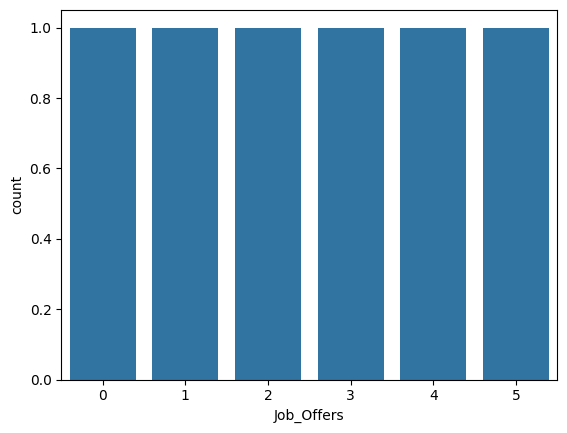

In [32]:
# Check the distribution of the target variable
sns.countplot(DIST_TARGET)
plt.show()

## DATA CLEANING AND PREPROCESSING

## FEATURE ENGINEERING

## MODELLING

In [33]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Job_Offers', session_id = 123)

# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Job_Offers
2,Target type,Multiclass
3,Original data shape,"(5000, 20)"
4,Transformed data shape,"(5000, 31)"
5,Transformed train set shape,"(3500, 31)"
6,Transformed test set shape,"(1500, 31)"
7,Numeric features,14
8,Categorical features,5
9,Preprocess,True


In [35]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.1780,0.5096,0.1780,0.1812,0.1759,0.0131,0.0132,0.2870
rf,Random Forest Classifier,0.1714,0.5103,0.1714,0.0459,0.0506,0.0003,0.0042,0.0460
dt,Decision Tree Classifier,0.1711,0.5000,0.1711,0.0293,0.0500,0.0000,0.0000,0.2030
ada,Ada Boost Classifier,0.1711,0.0000,0.1711,0.0293,0.0500,0.0000,0.0000,0.0300
gbc,Gradient Boosting Classifier,0.1711,0.0000,0.1711,0.0293,0.0500,0.0000,0.0000,0.2180
lda,Linear Discriminant Analysis,0.1711,0.0000,0.1711,0.0293,0.0500,0.0000,0.0000,0.0130
xgboost,Extreme Gradient Boosting,0.1711,0.4829,0.1711,0.0293,0.0500,0.0000,0.0000,0.0710
lightgbm,Light Gradient Boosting Machine,0.1711,0.4806,0.1711,0.0293,0.0500,0.0000,0.0000,0.3870
dummy,Dummy Classifier,0.1711,0.5000,0.1711,0.0293,0.0500,0.0000,0.0000,0.0130
svm,SVM - Linear Kernel,0.1694,0.0000,0.1694,0.0447,0.0595,0.0037,0.0075,0.0200


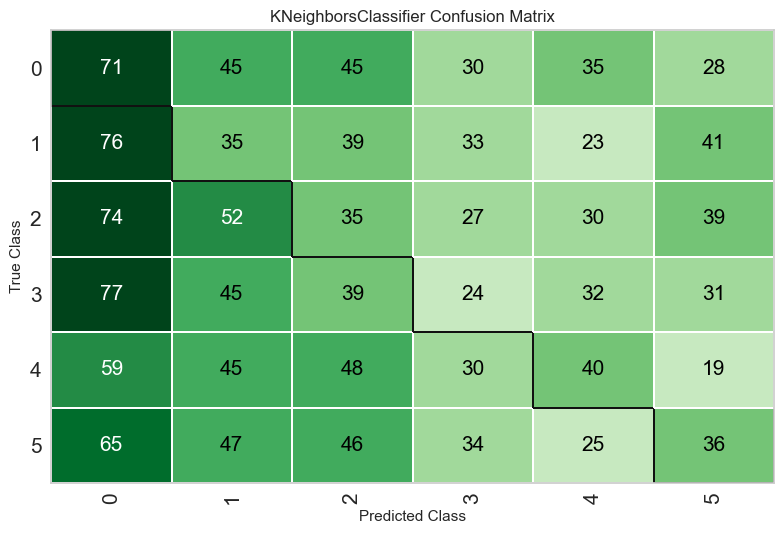

In [36]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

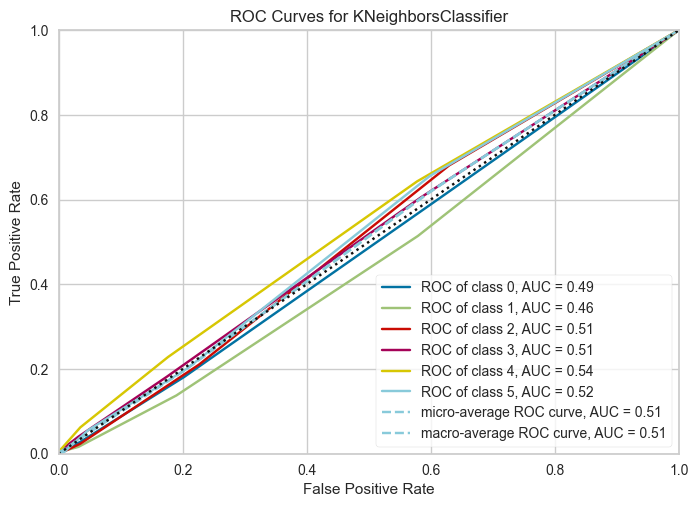

In [37]:
# plot AUC
plot_model(best, plot = 'auc')

In [38]:
# plot feature importance
plot_model(best, plot = 'feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [39]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'Starting_Salary', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Starting_Salary
2,Target type,Regression
3,Original data shape,"(5000, 20)"
4,Transformed data shape,"(5000, 31)"
5,Transformed train set shape,"(3500, 31)"
6,Transformed test set shape,"(1500, 31)"
7,Numeric features,14
8,Categorical features,5
9,Preprocess,True


In [40]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,11838.3611,212922992.0000,14588.0159,-0.0033,0.3083,0.2706,0.0580
et,Extra Trees Regressor,11840.2346,212941620.8934,14588.6574,-0.0034,0.3086,0.2710,0.0520
lr,Linear Regression,11840.1917,212939932.5747,14588.5938,-0.0034,0.3086,0.2710,0.0150
llar,Lasso Least Angle Regression,11840.1917,212939932.5747,14588.5938,-0.0034,0.3086,0.2710,0.0140
ridge,Ridge Regression,11840.1917,212939932.5746,14588.5938,-0.0034,0.3086,0.2710,0.0130
en,Elastic Net,11840.1917,212939932.5747,14588.5938,-0.0034,0.3086,0.2710,0.0130
dummy,Dummy Regressor,11840.1916,212939936.0000,14588.5938,-0.0034,0.3086,0.2710,0.0130
lasso,Lasso Regression,11840.1917,212939932.5747,14588.5938,-0.0034,0.3086,0.2710,0.0130
omp,Orthogonal Matching Pursuit,11840.1917,212939932.5747,14588.5938,-0.0034,0.3086,0.2710,0.0110
br,Bayesian Ridge,11840.1960,212940467.5843,14588.6121,-0.0034,0.3086,0.2710,0.0140


In [42]:
best = create_model('xgboost') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11748.9805,203894288.0000,14279.1553,-0.0026,0.2967,0.2593
1,11731.9814,214104992.0000,14632.3271,-0.0003,0.3084,0.2681
2,11749.4424,211725936.0000,14550.8057,-0.0015,0.3089,0.2685
3,11551.2832,208076912.0000,14424.8711,-0.0008,0.3142,0.2751
4,11508.9707,200255504.0000,14151.1660,-0.0001,0.3028,0.2659
5,11767.9932,200078016.0000,14144.8936,-0.0130,0.3149,0.2867
6,12172.8584,224582352.0000,14986.0723,-0.0005,0.3121,0.2740
7,11959.8711,221611792.0000,14886.6309,0.0001,0.3132,0.2739
8,11949.0146,214079104.0000,14631.4424,-0.0007,0.3091,0.2743


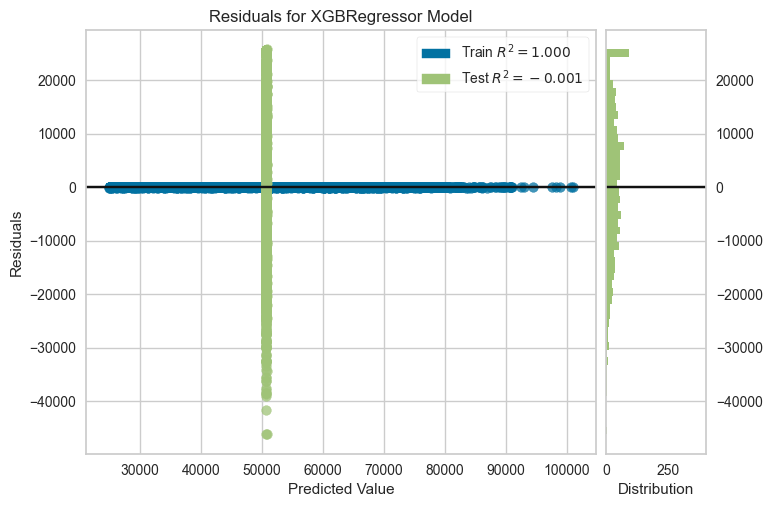

In [43]:
# plot residuals
plot_model(best, plot = 'residuals')

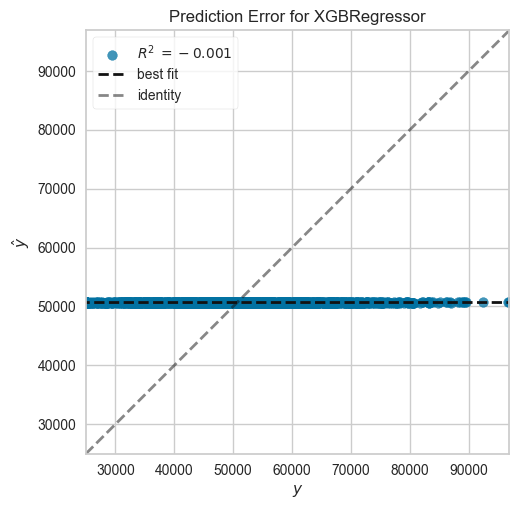

In [44]:
# plot error
plot_model(best, plot = 'error')

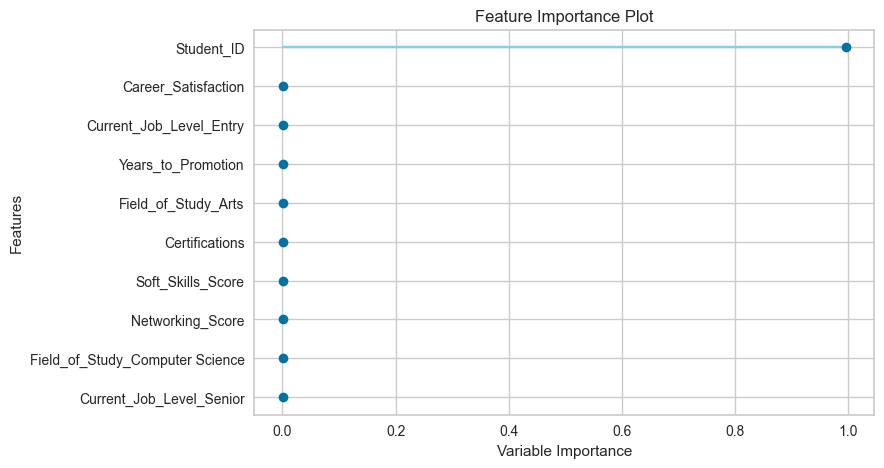

In [45]:
# plot feature importance
plot_model(best, plot = 'feature')